In [1]:
# Initial imports
import nltk
import pandas as pd
from path import Path
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Download/Update the VADER Lexicon
nltk.download("vader_lexicon")

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Read and load datasets
DATASET_ENCODING = "ISO-8859-1"

# Load news from CSV file
tweets10 = Path("elonmusk_tweet_history/2010_tweets.csv")
tweets11 = Path("elonmusk_tweet_history/2011_tweets.csv")
tweets12 = Path("elonmusk_tweet_history/2012_tweets.csv")
tweets13 = Path("elonmusk_tweet_history/2013_tweets.csv")
tweets14 = Path("elonmusk_tweet_history/2014_tweets.csv")
tweets15 = Path("elonmusk_tweet_history/2015_tweets.csv")
tweets16 = Path("elonmusk_tweet_history/2016_tweets.csv")
tweets17 = Path("elonmusk_tweet_history/2017_tweets.csv")
tweets18 = Path("elonmusk_tweet_history/2018_tweets.csv")
tweets19 = Path("elonmusk_tweet_history/2019_tweets.csv")
tweets20 = Path("elonmusk_tweet_history/2020_tweets.csv")
tweets21 = Path("elonmusk_tweet_history/2021_tweets.csv")
tweets22 = Path("elonmusk_tweet_history/2022_tweets.csv")

# Create Dataframe
tweets2010 = pd.read_csv(tweets10, encoding="utf-8-sig")
tweets2011 = pd.read_csv(tweets11, encoding="utf-8-sig")
tweets2012 = pd.read_csv(tweets12, encoding="utf-8-sig")
tweets2013 = pd.read_csv(tweets13, encoding="utf-8-sig")
tweets2014 = pd.read_csv(tweets14, encoding="utf-8-sig")
tweets2015 = pd.read_csv(tweets15, encoding="utf-8-sig")
tweets2016 = pd.read_csv(tweets16, encoding="utf-8-sig")
tweets2017 = pd.read_csv(tweets17, encoding="utf-8-sig")
tweets2018 = pd.read_csv(tweets18, encoding="utf-8-sig")
tweets2019 = pd.read_csv(tweets19, encoding="utf-8-sig")
tweets2020 = pd.read_csv(tweets20, encoding="utf-8-sig")
tweets2021 = pd.read_csv(tweets21, encoding="utf-8-sig")
tweets2022 = pd.read_csv(tweets22, encoding="utf-8-sig")

In [3]:
tweets2021.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1476662222617251846,1476620230692679680,2021-12-31 01:11:23 Arabian Standard Time,2021-12-31,01:11:23,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'roshanpateI', 'name': 'Rosha...",NaN,NaN,NaN,NaN
1,1476656306610216960,1476644467578859528,2021-12-31 00:47:53 Arabian Standard Time,2021-12-31,00:47:53,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'tesla_raj', 'name': 'Tesla R...",NaN,NaN,NaN,NaN
2,1476651519986614281,1476252898115964928,2021-12-31 00:28:51 Arabian Standard Time,2021-12-31,00:28:51,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CSmithson80', 'name': 'Chris...",NaN,NaN,NaN,NaN
3,1476619907076923398,1476252898115964928,2021-12-30 22:23:14 Arabian Standard Time,2021-12-30,22:23:14,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BLKMDL3', 'name': 'Zack', 'i...",NaN,NaN,NaN,NaN
4,1476618021024190474,1476252898115964928,2021-12-30 22:15:45 Arabian Standard Time,2021-12-30,22:15:45,400,44196397,elonmusk,Elon Musk,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'mims', 'name': 'Christopher ...",NaN,NaN,NaN,NaN


In [4]:
# Select Relevant Columns for the Dataframe
tweets2015df = tweets2015[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2016df = tweets2016[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2017df = tweets2017[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2018df = tweets2018[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2019df = tweets2019[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2020df = tweets2020[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2021df = tweets2021[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()
tweets2022df = tweets2022[['id','conversation_id','created_at','date','user_id','username','name','tweet']].copy()

In [5]:
tweets2019df.head(500)

,id,conversation_id,created_at,date,user_id,username,name,tweet
0,1211071324518531072,1210918835861241856,1.577577e+12,2019-12-28 23:47:59,44196397,elonmusk,Elon Musk,@Joe__Wakefield @austinbarnard45 @tjq1190 @tyg...
1,1211069054779301894,1210918835861241856,1.577576e+12,2019-12-28 23:38:57,44196397,elonmusk,Elon Musk,@austinbarnard45 @tjq1190 @tyger_cyber @fawful...
2,1211064937004589056,1210918835861241856,1.577575e+12,2019-12-28 23:22:36,44196397,elonmusk,Elon Musk,@IrinaAntony @tjq1190 @tyger_cyber @fawfulfan ...
3,1211054942192119808,1210918835861241856,1.577573e+12,2019-12-28 22:42:53,44196397,elonmusk,Elon Musk,@tjq1190 @tyger_cyber @fawfulfan @_Mikemo He d...
4,1211051740562366464,1210774027054145536,1.577572e+12,2019-12-28 22:30:09,44196397,elonmusk,Elon Musk,@geofficient Pretty much
...,...,...,...,...,...,...,...,...
495,1182005812975128576,1181925399514759173,1.570647e+12,2019-10-09 18:52:01,44196397,elonmusk,Elon Musk,@Teslarati We’re changing Powerwall Storm Watc...
496,1181991353212817408,1181988180326633472,1.570644e+12,2019-10-09 17:54:33,44196397,elonmusk,Elon Musk,@Kristennetten @annerajb @tesla_truth 🚀🚘 🧠🕳
497,1181990505363599360,1181988180326633472,1.570643e+12,2019-10-09 17:51:11,44196397,elonmusk,Elon Musk,@annerajb @tesla_truth Yes
498,1181990398379483137,1181988180326633472,1.570643e+12,2019-10-09 17:50:45,44196397,elonmusk,Elon Musk,@tesla_truth No change


In [6]:
bitcoin_tweets2017df = tweets2017df.loc[tweets2017df['tweet'].str.contains("bitcoin", case=False)]
bitcoin_tweets2017df

,id,conversation_id,created_at,date,user_id,username,name,tweet


In [7]:
bitcoin_tweets2018df = tweets2018df.loc[tweets2018df['tweet'].str.contains("bitcoin", case=False)]
bitcoin_tweets2018df

,id,conversation_id,created_at,date,user_id,username,name,tweet
494,1054520588734058496,1054501056229588992,1.540252e+12,2018-10-22 23:51:15,44196397,elonmusk,"Elon Musk, the 2nd",@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...


In [8]:
bitcoin_tweets2019df = tweets2019df.loc[tweets2019df['tweet'].str.contains("bitcoin", case=False)]
bitcoin_tweets2019df

,id,conversation_id,created_at,date,user_id,username,name,tweet
3354,1054520588734058496,1054501056229588992,1.540252e+12,2018-10-22 23:51:15,44196397,elonmusk,Elon Musk,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...


In [9]:
bitcoin_tweets2020df = tweets2020df.loc[tweets2020df['tweet'].str.contains("bitcoin", case=False)]
bitcoin_tweets2020df

,id,conversation_id,created_at,date,user_id,username,name,tweet
65,1340588909974200321,1340588909974200321,1.608456e+12,2020-12-20 09:24:37,44196397,elonmusk,Elon Musk,Bitcoin is almost as bs as fiat money
73,1340573003579617280,1340573003579617280,1.608452e+12,2020-12-20 08:21:25,44196397,elonmusk,Elon Musk,Bitcoin is my safe word
283,1328458535340949505,1328428879334297600,1.605564e+12,2020-11-16 22:02:51,44196397,elonmusk,Elon Musk,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶
1999,1261429085999296512,1261393885638639616,1.589583e+12,2020-05-15 22:51:44,44196397,elonmusk,Elon Musk,@jk_rowling I still only own 0.25 Bitcoins btw
2000,1261416824459030529,1261393885638639616,1.589580e+12,2020-05-15 22:03:01,44196397,elonmusk,Elon Musk,"@jk_rowling Pretty much, although massive curr..."
2263,1256353943765921792,1256239815256797184,1.588373e+12,2020-05-01 22:44:56,44196397,elonmusk,Elon Musk,@Bitcoin How much for some anime Bitcoin? htt...
2265,1256351293007736832,1256239815256797184,1.588372e+12,2020-05-01 22:34:24,44196397,elonmusk,Elon Musk,@Bitcoin 🤣🤣
3297,1215528293266362368,1215526980449255424,1.578640e+12,2020-01-10 06:58:23,44196397,elonmusk,Elon Musk,@bitcoin2020conf 😉
3298,1215526980449255424,1215526980449255424,1.578639e+12,2020-01-10 06:53:10,44196397,elonmusk,Elon Musk,Bitcoin is *not* my safe word
6759,1054520588734058496,1054501056229588992,1.540252e+12,2018-10-22 23:51:15,44196397,elonmusk,Elon Musk,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...


In [10]:
bitcoin_tweets2021df = tweets2021df.loc[tweets2021df['tweet'].str.contains("bitcoin", case=False)]
bitcoin_tweets2021df

,id,conversation_id,created_at,date,user_id,username,name,tweet
452,1461942451053252612,1461809183205036035,2021-11-20 10:20:16 Arabian Standard Time,2021-11-20,44196397,elonmusk,Elon Musk,@WSBChairman Bitcoin cures cancer
723,1452334458066149377,1452313323261861891,2021-10-24 22:01:32 Arabian Standard Time,2021-10-24,44196397,elonmusk,Elon Musk,@Filasophical @ShibaInuHodler Out of curiosity...
726,1452332044743323654,1451929526284562436,2021-10-24 21:51:57 Arabian Standard Time,2021-10-24,44196397,elonmusk,Elon Musk,@itsALLrisky @TeslaGong @mishaboar @DogecoinFd...
1468,1420529868404518913,1420267443436462082,2021-07-29 03:41:27 Arabian Standard Time,2021-07-29,44196397,elonmusk,Elon Musk,"@heydave7 We don’t have that many Bitcoin, but..."
1557,1417207016519454724,1417144324068974594,2021-07-19 23:37:37 Arabian Standard Time,2021-07-19,44196397,elonmusk,Elon Musk,"@jack @BitcoinMagazine @CathieDWood Sure, I ha..."
1558,1417204066552205332,1417144324068974594,2021-07-19 23:25:54 Arabian Standard Time,2021-07-19,44196397,elonmusk,Elon Musk,@BitcoinMagazine @jack @CathieDWood During thi...
1849,1408246534093918210,1408246196603346947,2021-06-25 06:11:52 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,“That’s not funny!” – Bitcoin maxis
1850,1408246196603346947,1408246196603346947,2021-06-25 06:10:31 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,How many Bitcoin maxis does it take to screw i...
1852,1408244494567456769,1408102135040970759,2021-06-25 06:03:46 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,@jack Oh right … Bitcoin haha
1885,1405482221666852871,1405479081655734274,2021-06-17 15:07:28 Arabian Standard Time,2021-06-17,44196397,elonmusk,Elon Musk,@BitcoinMagazine @jespow Based on what data?


In [11]:
bitcoin_tweets2022df = tweets2022df.loc[tweets2022df['tweet'].str.contains("bitcoin", case=False)]
bitcoin_tweets2022df

,id,conversation_id,created_at,date,user_id,username,name,tweet


In [12]:
combined_bitcoin_df = [bitcoin_tweets2022df,bitcoin_tweets2021df,bitcoin_tweets2020df,bitcoin_tweets2019df,bitcoin_tweets2018df,bitcoin_tweets2017df]
elon_combined_tweets = pd.concat(combined_bitcoin_df).reset_index()
elon_combined_tweets

,index,id,conversation_id,created_at,date,user_id,username,name,tweet
0,452,1461942451053252612,1461809183205036035,2021-11-20 10:20:16 Arabian Standard Time,2021-11-20,44196397,elonmusk,Elon Musk,@WSBChairman Bitcoin cures cancer
1,723,1452334458066149377,1452313323261861891,2021-10-24 22:01:32 Arabian Standard Time,2021-10-24,44196397,elonmusk,Elon Musk,@Filasophical @ShibaInuHodler Out of curiosity...
2,726,1452332044743323654,1451929526284562436,2021-10-24 21:51:57 Arabian Standard Time,2021-10-24,44196397,elonmusk,Elon Musk,@itsALLrisky @TeslaGong @mishaboar @DogecoinFd...
3,1468,1420529868404518913,1420267443436462082,2021-07-29 03:41:27 Arabian Standard Time,2021-07-29,44196397,elonmusk,Elon Musk,"@heydave7 We don’t have that many Bitcoin, but..."
4,1557,1417207016519454724,1417144324068974594,2021-07-19 23:37:37 Arabian Standard Time,2021-07-19,44196397,elonmusk,Elon Musk,"@jack @BitcoinMagazine @CathieDWood Sure, I ha..."
5,1558,1417204066552205332,1417144324068974594,2021-07-19 23:25:54 Arabian Standard Time,2021-07-19,44196397,elonmusk,Elon Musk,@BitcoinMagazine @jack @CathieDWood During thi...
6,1849,1408246534093918210,1408246196603346947,2021-06-25 06:11:52 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,“That’s not funny!” – Bitcoin maxis
7,1850,1408246196603346947,1408246196603346947,2021-06-25 06:10:31 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,How many Bitcoin maxis does it take to screw i...
8,1852,1408244494567456769,1408102135040970759,2021-06-25 06:03:46 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,@jack Oh right … Bitcoin haha
9,1885,1405482221666852871,1405479081655734274,2021-06-17 15:07:28 Arabian Standard Time,2021-06-17,44196397,elonmusk,Elon Musk,@BitcoinMagazine @jespow Based on what data?


In [13]:
# Clean Tweet Data for Sentiment Analysis

# Defining set containing all stopwords in English.

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

# Cleaning and removing the above stop words list from the tweet text

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
elon_combined_tweets['tweet'] = elon_combined_tweets['tweet'].apply(lambda text: cleaning_stopwords(text))
elon_combined_tweets['tweet'].head(20)

0                     @WSBChairman Bitcoin cures cancer
1     @Filasophical @ShibaInuHodler Out curiosity, I...
2     @itsALLrisky @TeslaGong @mishaboar @DogecoinFd...
3       @heydave7 We don’t many Bitcoin, but it’s close
4       @jack @BitcoinMagazine @CathieDWood Sure, I ton
5     @BitcoinMagazine @jack @CathieDWood During tal...
6                   “That’s not funny!” – Bitcoin maxis
7          How many Bitcoin maxis take screw lightbulb?
8                         @jack Oh right … Bitcoin haha
9                  @BitcoinMagazine @jespow Based data?
10    @Cointelegraph This inaccurate. Tesla sold ~10...
11    @lexfridman @VitalikButerin @ethereum @Bitcoin...
12                   #Bitcoin 💔 https://t.co/lNnEfMdtJf
13    Spoke North American Bitcoin miners. They comm...
14    @TeslaGong @wintonARK Bitcoin hashing (aka min...
15    @BTC_Archive To clarify speculation, Tesla not...
16    @ChainLinkGod @PeterMcCormack Bitcoin actually...
17    @poisonouspinups @michael_saylor He wear o

In [14]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
elon_combined_tweets['tweet']= elon_combined_tweets['tweet'].apply(lambda x: cleaning_punctuations(x))
elon_combined_tweets['tweet'].tail()

33                                    bitcoin2020conf 😉
34                                Bitcoin not safe word
35    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
36    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
37    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
Name: tweet, dtype: object

In [15]:
# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
elon_combined_tweets['tweet'] = elon_combined_tweets['tweet'].apply(lambda x: cleaning_repeating_char(x))
elon_combined_tweets['tweet'].tail()

33                                    bitcoin2020conf 😉
34                                Bitcoin not safe word
35    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
36    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
37    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
Name: tweet, dtype: object

In [16]:
# Cleaning and removing URL’s
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
elon_combined_tweets['tweet'] = elon_combined_tweets['tweet'].apply(lambda x: cleaning_URLs(x))
elon_combined_tweets['tweet'].tail()

33                                    bitcoin2020conf 😉
34                                Bitcoin not safe word
35    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
36    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
37    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
Name: tweet, dtype: object

In [17]:
# Cleaning and removing Numberic Numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
elon_combined_tweets['tweet'] = elon_combined_tweets['tweet'].apply(lambda x: cleaning_numbers(x))
elon_combined_tweets['tweet'].tail()

33                                        bitcoinconf 😉
34                                Bitcoin not safe word
35    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
36    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
37    vicentes Grimezsz Wanna buy Bitcoin 😉😉 httpstc...
Name: tweet, dtype: object

In [39]:
# Removing Emojis from the dataframe: Link Below
""" https://sahil-fruitwala.medium.com/data-cleaning-101-b3d29223f256 """

elon_combined_tweets = elon_combined_tweets.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
elon_combined_tweets

,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
date_New,,,,,,,,
2021-11-20,elonmusk,Elon Musk,WSBChairman Bitcoin cures cancer,-0.6597,0.0,0.405,0.595,-1
2021-10-24,elonmusk,Elon Musk,Filasophical ShibaInuHodler Out curiosity I ac...,0.6369,0.133,0.867,0.0,1
2021-10-24,elonmusk,Elon Musk,itsALLrisky TeslaGong mishaboar DogecoinFdn Po...,-0.0697,0.149,0.693,0.158,-1
2021-07-29,elonmusk,Elon Musk,heydave We dont many Bitcoin but its close,0.0,0.0,1.0,0.0,0
2021-07-19,elonmusk,Elon Musk,jack BitcoinMagazine CathieDWood Sure I ton,0.3182,0.365,0.635,0.0,1
2021-07-19,elonmusk,Elon Musk,BitcoinMagazine jack CathieDWood During talk s...,0.0,0.0,1.0,0.0,0
2021-06-25,elonmusk,Elon Musk,Thats not funny Bitcoin maxis,-0.3412,0.0,0.624,0.376,-1
2021-06-25,elonmusk,Elon Musk,How many Bitcoin maxis take screw lightbulb,-0.1027,0.0,0.811,0.189,-1
2021-06-25,elonmusk,Elon Musk,jack Oh right Bitcoin haha,0.4588,0.429,0.571,0.0,1


In [ ]:
elon_combined_tweets.plot(figsize=(12,8),x='date', rot=50,y=['text_compound'])

In [19]:
#  Sentiment Analysis

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [20]:
# Sentiment scores dictionaries
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in elon_combined_tweets.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["tweet"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent)
elon_combined_tweets = elon_combined_tweets.join(text_sentiment_df)

In [21]:
elon_combined_tweets

,index,id,conversation_id,created_at,date,user_id,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
0,452,1461942451053252612,1461809183205036035,2021-11-20 10:20:16 Arabian Standard Time,2021-11-20,44196397,elonmusk,Elon Musk,WSBChairman Bitcoin cures cancer,-0.6597,0.000,0.405,0.595,-1
1,723,1452334458066149377,1452313323261861891,2021-10-24 22:01:32 Arabian Standard Time,2021-10-24,44196397,elonmusk,Elon Musk,Filasophical ShibaInuHodler Out curiosity I ac...,0.6369,0.133,0.867,0.000,1
2,726,1452332044743323654,1451929526284562436,2021-10-24 21:51:57 Arabian Standard Time,2021-10-24,44196397,elonmusk,Elon Musk,itsALLrisky TeslaGong mishaboar DogecoinFdn Po...,-0.0697,0.149,0.693,0.158,-1
3,1468,1420529868404518913,1420267443436462082,2021-07-29 03:41:27 Arabian Standard Time,2021-07-29,44196397,elonmusk,Elon Musk,heydave We dont many Bitcoin but its close,0.0000,0.000,1.000,0.000,0
4,1557,1417207016519454724,1417144324068974594,2021-07-19 23:37:37 Arabian Standard Time,2021-07-19,44196397,elonmusk,Elon Musk,jack BitcoinMagazine CathieDWood Sure I ton,0.3182,0.365,0.635,0.000,1
5,1558,1417204066552205332,1417144324068974594,2021-07-19 23:25:54 Arabian Standard Time,2021-07-19,44196397,elonmusk,Elon Musk,BitcoinMagazine jack CathieDWood During talk s...,0.0000,0.000,1.000,0.000,0
6,1849,1408246534093918210,1408246196603346947,2021-06-25 06:11:52 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,Thats not funny Bitcoin maxis,-0.3412,0.000,0.624,0.376,-1
7,1850,1408246196603346947,1408246196603346947,2021-06-25 06:10:31 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,How many Bitcoin maxis take screw lightbulb,-0.1027,0.000,0.811,0.189,-1
8,1852,1408244494567456769,1408102135040970759,2021-06-25 06:03:46 Arabian Standard Time,2021-06-25,44196397,elonmusk,Elon Musk,jack Oh right Bitcoin haha,0.4588,0.429,0.571,0.000,1
9,1885,1405482221666852871,1405479081655734274,2021-06-17 15:07:28 Arabian Standard Time,2021-06-17,44196397,elonmusk,Elon Musk,BitcoinMagazine jespow Based data,0.0000,0.000,1.000,0.000,0


In [22]:
# convert to datetime
elon_combined_tweets['date'] = pd.to_datetime(elon_combined_tweets['date'])
elon_combined_tweets['date_New'] = elon_combined_tweets['date'].dt.date
elon_combined_tweets = elon_combined_tweets.drop(columns=['id','conversation_id','created_at','user_id','index'])

In [23]:
elon_combined_tweets.index = elon_combined_tweets['date_New']
elon_combined_tweets = elon_combined_tweets.drop(columns=['date_New','date'])
elon_combined_tweets

,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
date_New,,,,,,,,
2021-11-20,elonmusk,Elon Musk,WSBChairman Bitcoin cures cancer,-0.6597,0.000,0.405,0.595,-1
2021-10-24,elonmusk,Elon Musk,Filasophical ShibaInuHodler Out curiosity I ac...,0.6369,0.133,0.867,0.000,1
2021-10-24,elonmusk,Elon Musk,itsALLrisky TeslaGong mishaboar DogecoinFdn Po...,-0.0697,0.149,0.693,0.158,-1
2021-07-29,elonmusk,Elon Musk,heydave We dont many Bitcoin but its close,0.0000,0.000,1.000,0.000,0
2021-07-19,elonmusk,Elon Musk,jack BitcoinMagazine CathieDWood Sure I ton,0.3182,0.365,0.635,0.000,1
2021-07-19,elonmusk,Elon Musk,BitcoinMagazine jack CathieDWood During talk s...,0.0000,0.000,1.000,0.000,0
2021-06-25,elonmusk,Elon Musk,Thats not funny Bitcoin maxis,-0.3412,0.000,0.624,0.376,-1
2021-06-25,elonmusk,Elon Musk,How many Bitcoin maxis take screw lightbulb,-0.1027,0.000,0.811,0.189,-1
2021-06-25,elonmusk,Elon Musk,jack Oh right Bitcoin haha,0.4588,0.429,0.571,0.000,1


In [24]:
bitcoin_price = Path("../../crypto_data/BTCUSDT.csv")
bitcoin_price = pd.read_csv(bitcoin_price, encoding="utf-8-sig", header=[1])
bitcoin_price = bitcoin_price.drop(columns=['unix'])
bitcoin_price

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,10/04/2022 0:00,BTC/USDT,42753.96,42776.62,42653.68,42653.69,547.32868,23374135.52,23134.0
1,9/04/2022 23:00,BTC/USDT,42543.42,42800.00,42488.23,42753.97,1075.30723,45889601.98,30337.0
2,9/04/2022 22:00,BTC/USDT,42558.06,42634.88,42501.31,42543.42,439.09087,18693342.59,18922.0
3,9/04/2022 21:00,BTC/USDT,42423.18,42584.49,42390.00,42558.06,425.13616,18063585.63,19529.0
4,9/04/2022 20:00,BTC/USDT,42511.95,42638.00,42423.18,42423.18,419.45489,17846424.65,21083.0
...,...,...,...,...,...,...,...,...,...
40699,17/08/2017 8:00,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.94990,4139.70,NaN
40700,17/08/2017 7:00,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.44000,19241.06,NaN
40701,17/08/2017 6:00,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.23000,31282.31,NaN
40702,17/08/2017 5:00,BTC/USDT,4308.83,4328.69,4291.37,4315.32,23.23000,100304.82,NaN


In [25]:
bitcoin_df = bitcoin_price.drop(columns=['high','low','open','Volume BTC','Volume USDT','tradecount'])
bitcoin_df['date'] = pd.to_datetime(bitcoin_df['date'])
bitcoin_df['date_New'] = bitcoin_df['date'].dt.date
bitcoin_df = bitcoin_df.drop(columns=['date'])
bitcoin_df

,symbol,close,date_New
0,BTC/USDT,42653.69,2022-10-04
1,BTC/USDT,42753.97,2022-09-04
2,BTC/USDT,42543.42,2022-09-04
3,BTC/USDT,42558.06,2022-09-04
4,BTC/USDT,42423.18,2022-09-04
...,...,...,...
40699,BTC/USDT,4360.69,2017-08-17
40700,BTC/USDT,4349.99,2017-08-17
40701,BTC/USDT,4324.35,2017-08-17
40702,BTC/USDT,4315.32,2017-08-17


In [26]:
bitcoin_df = bitcoin_df.drop_duplicates(['date_New'], keep='last')
bitcoin_df

,symbol,close,date_New
0,BTC/USDT,42653.69,2022-10-04
24,BTC/USDT,42435.02,2022-09-04
48,BTC/USDT,43327.46,2022-08-04
72,BTC/USDT,42894.30,2022-07-04
96,BTC/USDT,45005.88,2022-06-04
...,...,...,...
40611,BTC/USDT,4108.28,2017-08-21
40635,BTC/USDT,4086.09,2017-08-20
40659,BTC/USDT,4163.49,2017-08-19
40683,BTC/USDT,4286.53,2017-08-18


In [27]:
bitcoin_df.index = bitcoin_df['date_New']
bitcoin_df = bitcoin_df.drop(columns=['symbol','date_New'])

In [28]:
bitcoin_df

,close
date_New,
2022-10-04,42653.69
2022-09-04,42435.02
2022-08-04,43327.46
2022-07-04,42894.30
2022-06-04,45005.88
...,...
2017-08-21,4108.28
2017-08-20,4086.09
2017-08-19,4163.49


In [29]:
# Use the `pct_change` function to calculate daily returns of Bitcoin
bitcoin_df_returns = bitcoin_df.pct_change().dropna()
bitcoin_df_returns = bitcoin_df_returns.drop_duplicates(keep='last')
# Display sample data
bitcoin_df_returns.head(50)

,close
date_New,
2022-09-04,-0.005127
2022-08-04,0.021031
2022-07-04,-0.009997
2022-06-04,0.049228
2022-05-04,0.033465
2022-04-04,-0.013973
2022-03-04,0.004429
2022-02-04,0.018012
2022-01-04,-0.028861


In [30]:
# Merge with Sentiment 
elon_combined_tweets_merge = bitcoin_df_returns.join(elon_combined_tweets).dropna(how="any")

# Display data
display(elon_combined_tweets_merge)

,close,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
date_New,,,,,,,,,
2018-10-22,0.001089,elonmusk,Elon Musk,vicentes Grimezsz Wanna buy Bitcoin httpstcoZ...,0.0000,0.000,1.000,0.000,0.0
2018-10-22,0.001089,elonmusk,Elon Musk,vicentes Grimezsz Wanna buy Bitcoin httpstcoZ...,0.0000,0.000,1.000,0.000,0.0
2018-10-22,0.001089,elonmusk,"Elon Musk, the 2nd",vicentes Grimezsz Wanna buy Bitcoin httpstcoZ...,0.0000,0.000,1.000,0.000,0.0
2020-01-10,0.018484,elonmusk,Elon Musk,bitcoinconf,0.0000,0.000,1.000,0.000,0.0
2020-01-10,0.018484,elonmusk,Elon Musk,Bitcoin not safe word,-0.3412,0.000,0.555,0.445,-1.0
2020-05-01,-0.000714,elonmusk,Elon Musk,Bitcoin How much anime Bitcoin httpstcoitqRslFNcb,0.0000,0.000,1.000,0.000,0.0
2020-05-01,-0.000714,elonmusk,Elon Musk,Bitcoin,0.0000,0.000,1.000,0.000,0.0
2020-05-15,0.039834,elonmusk,Elon Musk,jkrowling I still Bitcoins btw,0.0000,0.000,1.000,0.000,0.0
2020-05-15,0.039834,elonmusk,Elon Musk,jkrowling Pretty much although massive currenc...,0.5859,0.242,0.758,0.000,1.0


In [31]:
""" SAVE AS CSV """

elon_combined_tweets_merge = elon_combined_tweets_merge.drop_duplicates()
elon_combined_tweets_merge

,close,username,name,tweet,text_compound,text_pos,text_neu,text_neg,text_sent
date_New,,,,,,,,,
2018-10-22,0.001089,elonmusk,Elon Musk,vicentes Grimezsz Wanna buy Bitcoin httpstcoZ...,0.0000,0.000,1.000,0.000,0.0
2018-10-22,0.001089,elonmusk,"Elon Musk, the 2nd",vicentes Grimezsz Wanna buy Bitcoin httpstcoZ...,0.0000,0.000,1.000,0.000,0.0
2020-01-10,0.018484,elonmusk,Elon Musk,bitcoinconf,0.0000,0.000,1.000,0.000,0.0
2020-01-10,0.018484,elonmusk,Elon Musk,Bitcoin not safe word,-0.3412,0.000,0.555,0.445,-1.0
2020-05-01,-0.000714,elonmusk,Elon Musk,Bitcoin How much anime Bitcoin httpstcoitqRslFNcb,0.0000,0.000,1.000,0.000,0.0
2020-05-01,-0.000714,elonmusk,Elon Musk,Bitcoin,0.0000,0.000,1.000,0.000,0.0
2020-05-15,0.039834,elonmusk,Elon Musk,jkrowling I still Bitcoins btw,0.0000,0.000,1.000,0.000,0.0
2020-05-15,0.039834,elonmusk,Elon Musk,jkrowling Pretty much although massive currenc...,0.5859,0.242,0.758,0.000,1.0
2020-11-16,-0.049578,elonmusk,Elon Musk,MaisieWilliams Toss bitcoin ur Witcher,0.0000,0.000,1.000,0.000,0.0


In [32]:
elon_combined_tweets_merge.corr().style.background_gradient()

,close,text_compound,text_pos,text_neu,text_neg,text_sent
close,1.000000,-0.090324,-0.085398,0.022050,0.062037,-0.005686
text_compound,-0.090324,1.000000,0.691094,-0.084735,-0.621097,0.909019
text_pos,-0.085398,0.691094,1.000000,-0.644221,-0.235991,0.651513
text_neu,0.022050,-0.084735,-0.644221,1.000000,-0.591206,-0.005828
text_neg,0.062037,-0.621097,-0.235991,-0.591206,1.000000,-0.679613
text_sent,-0.005686,0.909019,0.651513,-0.005828,-0.679613,1.000000


In [33]:
# Separate the Features (X) from the Target (y)
y = elon_combined_tweets_merge['close']
X = elon_combined_tweets_merge.drop(columns="close")
y.shape

(37,)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# """ SAVE RESULTS AS CSV """

# elon_combined_tweets.to_csv("Results\elon_musk_sentiment_analysis.csv")
# elon_combined_tweets_merge.to_csv("Results\elon_musk_merge_sentiment_analysis.csv")

In [ ]:
bitcoin_price = Path("../../crypto_data/BTCUSDT.csv")
bitcoin_price = pd.read_csv(bitcoin_price, encoding="utf-8-sig", header=[1])
bitcoin_price = bitcoin_price.drop(columns=['unix'])
bitcoin_price

In [38]:
elon_combined_tweets.plot(figsize=(12,8),x='date', rot=50,y=['text_compound'])

KeyError: 'date'

<AxesSubplot:xlabel='date'>

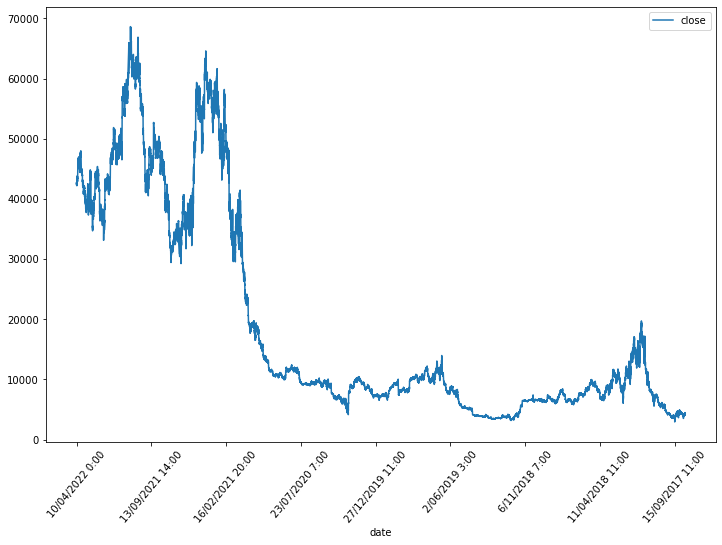

In [36]:
bitcoin_price.plot(figsize=(12,8), x='date',rot=50,y='close')